### Machine Learning with Iris Dataset

The "Hello World" of machine learning. Flower classification is a very important, simple, and basic project for any machine learning student.

<img src="flowers.png" alt="Alternative text" />

### Step 1: Import the necessary packages

numpy is a python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more

pandas is an open source data analysis and manipulation tool, built on top of the Python programming language.

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.



In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Step 2: Familiarize yourself with the dataset

In [138]:
df = pd.read_csv('./iris/iris.data',header=None)

In [139]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [140]:
df = df.rename(columns={0: "SepalLengthCm", 1: "SepalWidthCm", 2: "PetalLengthCm", 3: "PetalWidthCm", 4: "Species"})

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [142]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [143]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Step 3: Data Visualization

#### Using Pairplot

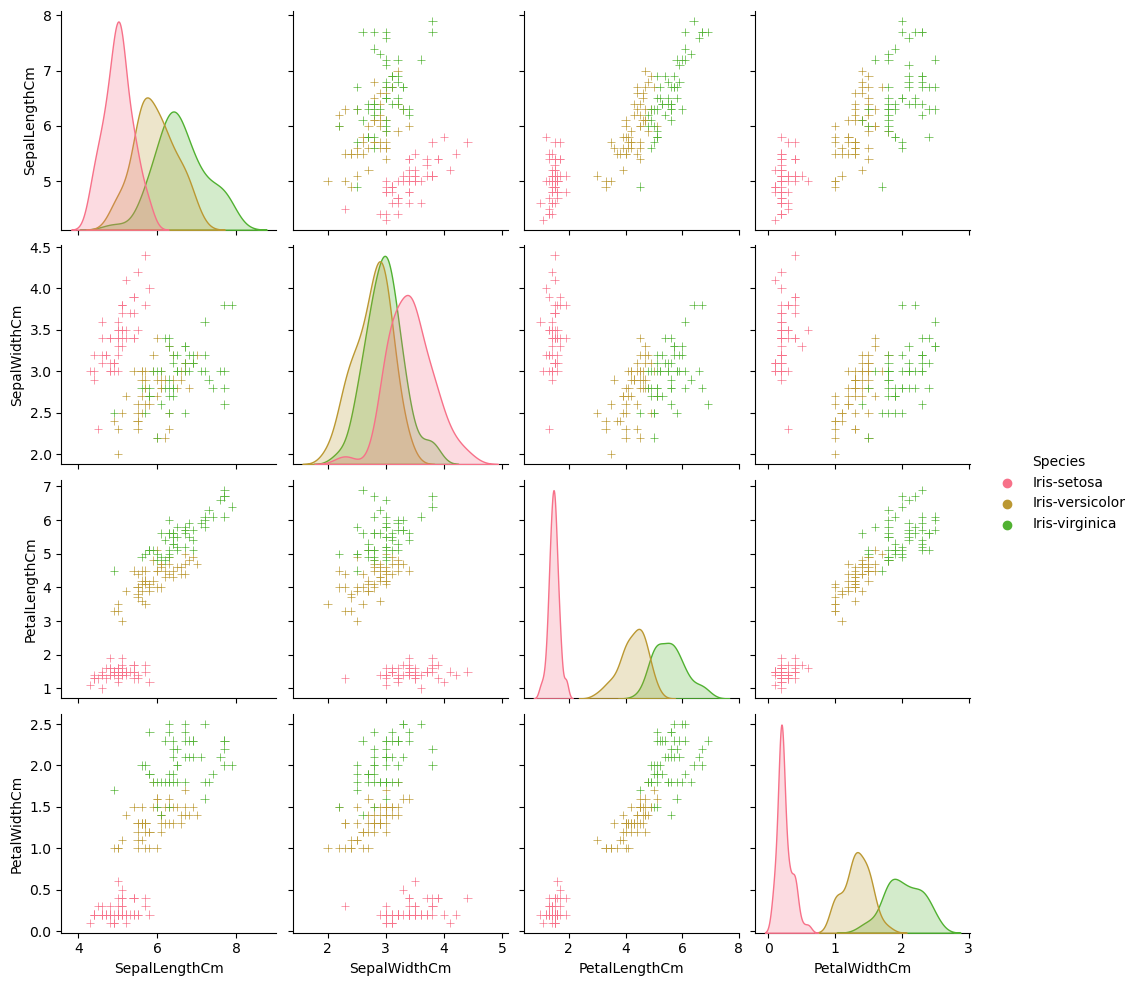

In [144]:
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

#### Using Violinplot
Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups.

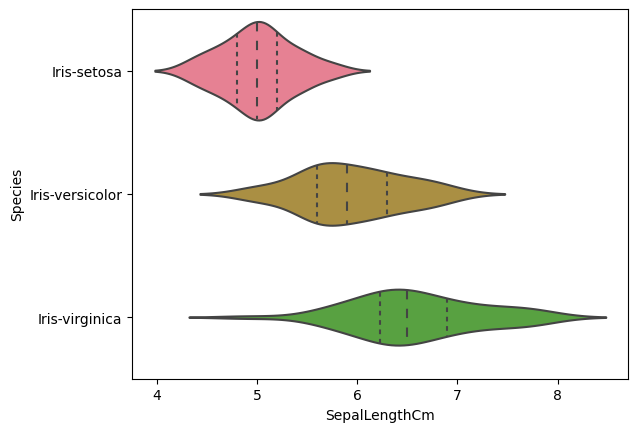

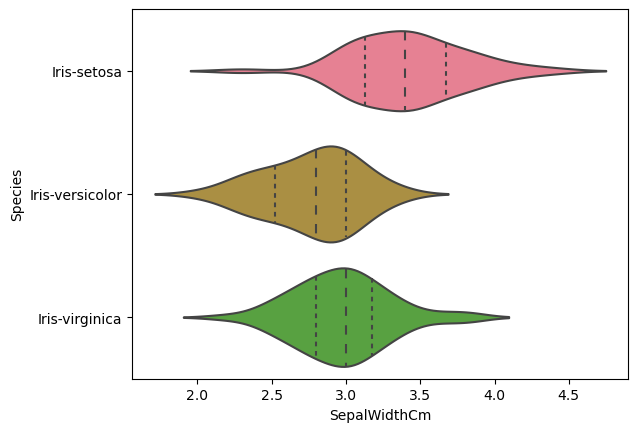

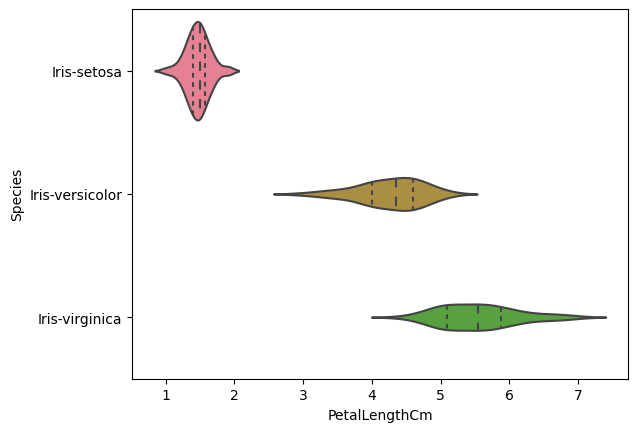

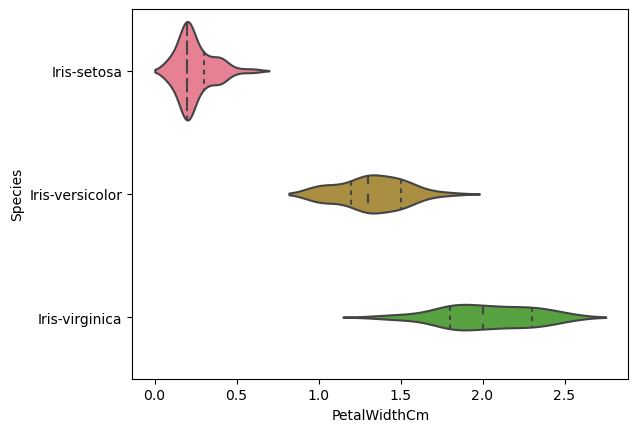

In [145]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

### Step 4: Split the dataset into a training set and a testing set

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


### Step 5: Create the model

#### Using KneighborsClassifer

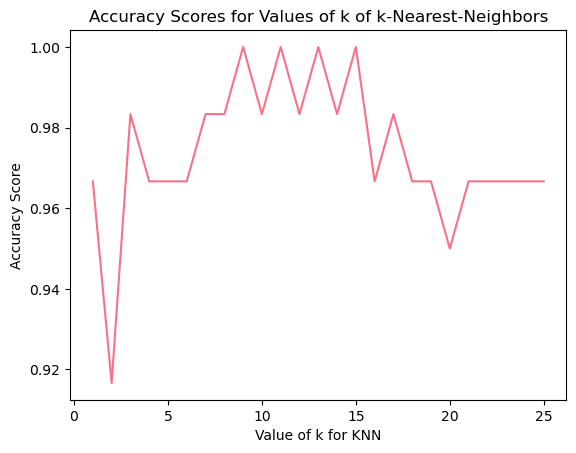

In [147]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

#### Using LogisticRegression

In [148]:
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Test the model
y_pred = logreg.predict(X_test)

# Print accuracy
print(metrics.accuracy_score(y_test, y_pred))


0.9833333333333333


### Step 6: Test the model using samples that are not in the dataset

#### Predict Using KNN

In [149]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

/Users/SLY/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

#### Predict Using Logistic Regression

In [151]:
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Test the model
logreg.predict([[6, 3, 4, 2]])

/Users/SLY/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)